#Handling missing value

In [1]:
import pandas as pd
import numpy as np

In [2]:
data={
    "A":[1,2,100,4,5],
    "B":[3,np.nan,7,8,9],
    "C":[np.nan,12,13,14,15]
}

In [4]:
df=pd.DataFrame(data)

In [6]:
df

,A,B,C
0,1,3.0,NaN
1,2,NaN,12.0
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [5]:
df.isnull().sum()

,0
A,0
B,1
C,1


In [7]:
#drop all the null rows
df.dropna()

,A,B,C
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [8]:
#drop column with missing value
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [9]:
#imputation of missing value with mean
df['B'].fillna(df['B'].mean())

,B
0,3.00
1,6.75
2,7.00
3,8.00
4,9.00


In [10]:
#imputing with constants
df['B'].fillna(0)

,B
0,3.0
1,0.0
2,7.0
3,8.0
4,9.0


In [11]:
#imputing with median
df['B'].fillna(df['B'].median)

,B
0,3.0
1,<bound method Series.median of 0 3.0\n1 ...
2,7.0
3,8.0
4,9.0


In [12]:
import seaborn as sns
df=sns.load_dataset('titanic')


In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [16]:
(df.isnull().sum()/len(df.index))*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [17]:
(df.isnull().sum()/len(df.index))

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,0.198653
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.002245
class,0.000000
who,0.000000


In [18]:
df.shape

(891, 15)

In [20]:
df['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [24]:
df['embark_town']=df['embark_town'].fillna("Southampton")

In [25]:
df['embark_town'].isna().sum()

0

In [26]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [27]:
df.drop('deck',axis=1,inplace=True)

In [28]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

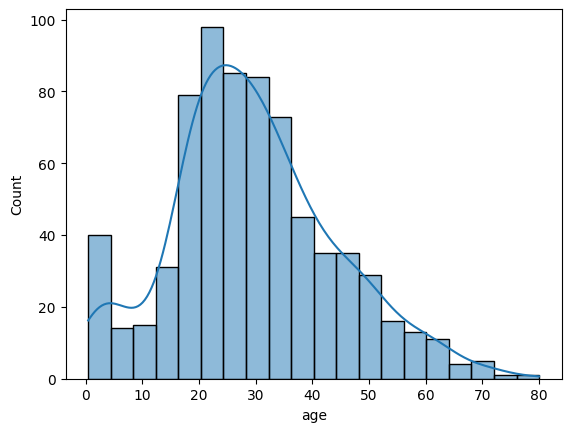

In [29]:
sns.histplot(df.age,kde=True)

In [30]:
#Normal dist, no outlier
df['age'].mean()

29.69911764705882

In [32]:
df['age']=df['age'].fillna(df['age'].mean())

In [34]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [36]:
df['embarked']=df['embarked'].fillna('S')

In [38]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [41]:
#homework>> create a seperate column with flag 1 and 0

df['flag']=df.age.apply(lambda x: 1 if pd.isna(x) else 0)

In [42]:
df['flag']

,flag
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [43]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,flag
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


#Data Interpolation

In [4]:
# data interpolation >> is a process of estimating data in a range,getting unknown values from known values
#1) linear  interpolation
#2) quadratic interpolation
#3) polynomial interpolation

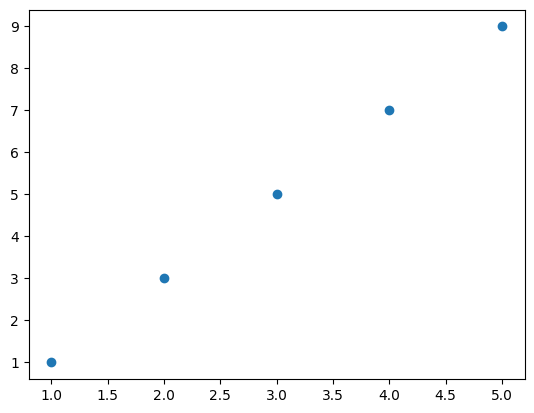

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x= np.array([1,2,3,4,5])
y= np.array([1,3,5,7,9])
plt.scatter(x,y)

In [8]:
#linear interpolation

x_new =np.linspace(1,5,23)
x_new

array([1.        , 1.18181818, 1.36363636, 1.54545455, 1.72727273,
       1.90909091, 2.09090909, 2.27272727, 2.45454545, 2.63636364,
       2.81818182, 3.        , 3.18181818, 3.36363636, 3.54545455,
       3.72727273, 3.90909091, 4.09090909, 4.27272727, 4.45454545,
       4.63636364, 4.81818182, 5.        ])

In [9]:
y_inter=np.interp(x_new,x,y)

In [10]:
y_inter

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        , 5.36363636, 5.72727273, 6.09090909,
       6.45454545, 6.81818182, 7.18181818, 7.54545455, 7.90909091,
       8.27272727, 8.63636364, 9.        ])

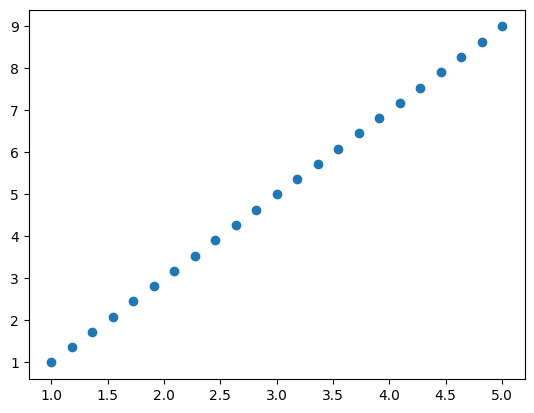

In [11]:
plt.scatter(x_new,y_inter)

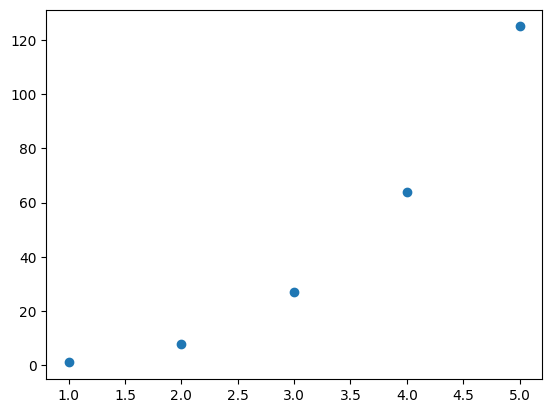

In [13]:
# cubic interpolation

x =np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])
plt.scatter(x,y)

In [16]:
from scipy.interpolate import interp1d

In [17]:
f = interp1d(x,y,kind='cubic')

In [18]:
f

In [19]:
x_new=np.linspace(1,4,10)
y_inter=f(x_new)

In [20]:
y_inter

array([ 1.        ,  2.37037037,  4.62962963,  8.        , 12.7037037 ,
       18.96296296, 27.        , 37.03703704, 49.2962963 , 64.        ])

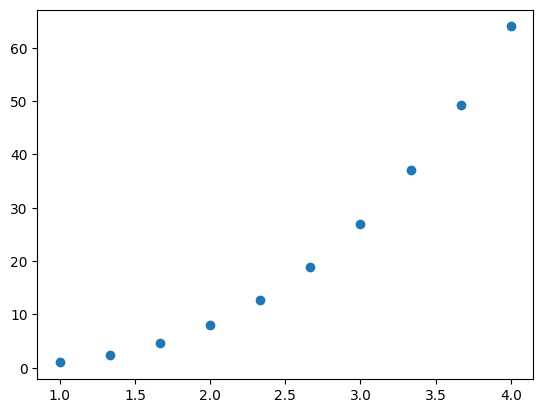

In [21]:
plt.scatter(x_new,y_inter)

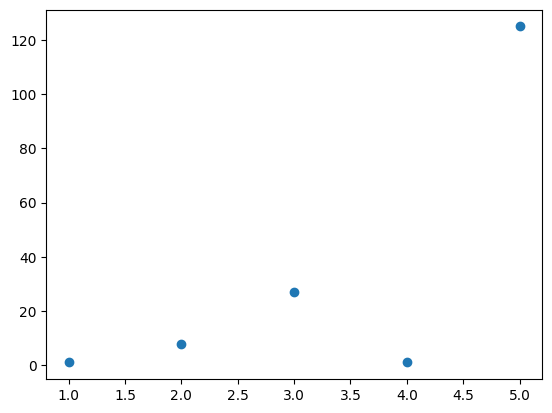

In [24]:
#polynomial interrpolation

x = np.array([1,2,3,4,5])
y=np.array([1,8,27,1,125])
plt.scatter(x,y)

In [26]:
x=np.polyfit(x,y,2)

In [27]:
x_new = np.linspace(1,5,10)
y_inter= np.polyval(x,x_new)

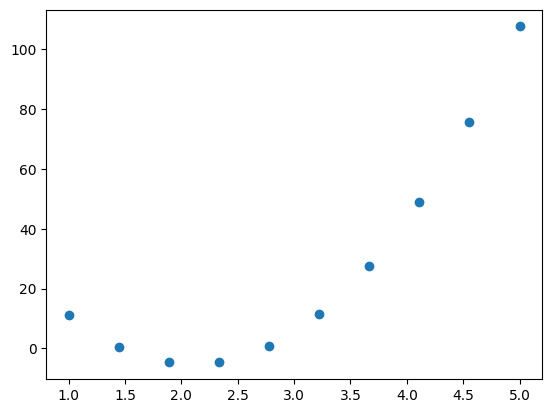

In [30]:
plt.scatter(x_new,y_inter)

Use cases:
1) Missing data(value)
2)

#Outliers and its treatment

In [39]:
salary=[11,23,6,45,67,78,89,78,65,44,56,77,899,79,100,128,222]

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [41]:
# five point summary>> 0th, 25th 50th,75th,100 percentile

np.quantile(salary,[0,0.25,0.50,0.75,1])

array([  6.,  45.,  77.,  89., 899.])

In [42]:
df=pd.DataFrame(salary,columns=['salary'])

In [43]:
df.describe()

,salary
count,17.000000
mean,121.588235
std,206.352568
min,6.000000
25%,45.000000
50%,77.000000
75%,89.000000
max,899.000000


Text(0.5, 1.0, 'Box plot')

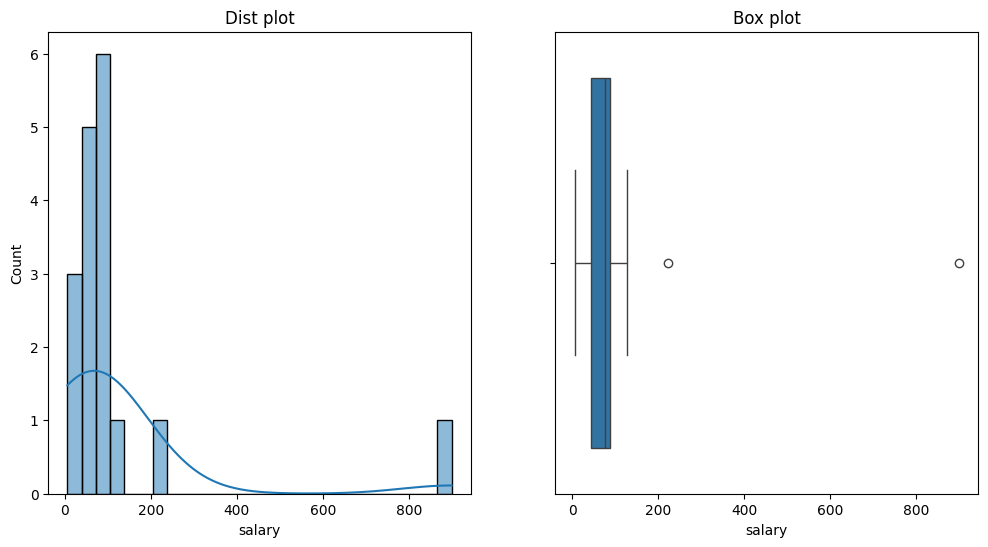

In [44]:
# to check outliers>>distribution plot, boxplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['salary'],kde=True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data=df,x=df['salary'])
plt.title('Box plot')

In [45]:
# handle this by dropping outlier
#capping the outlier
#replace with mean and median
#scaling and transformation

In [46]:
Q1 =df['salary'].quantile(0.25)
Q3 =df['salary'].quantile(0.75)


In [47]:
Q1

45.0

In [62]:
Q3

89.0

In [49]:
IQR =Q3-Q1
IQR

44.0

In [50]:
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR

In [51]:
lower_fence

-21.0

In [52]:
upper_fence

155.0

In [54]:
df.shape

(17, 1)

In [55]:
#dropping the outlier

df_filtered=df[(df.salary>=lower_fence) & (df.salary<=upper_fence)]



In [56]:
df_filtered.shape

(15, 1)

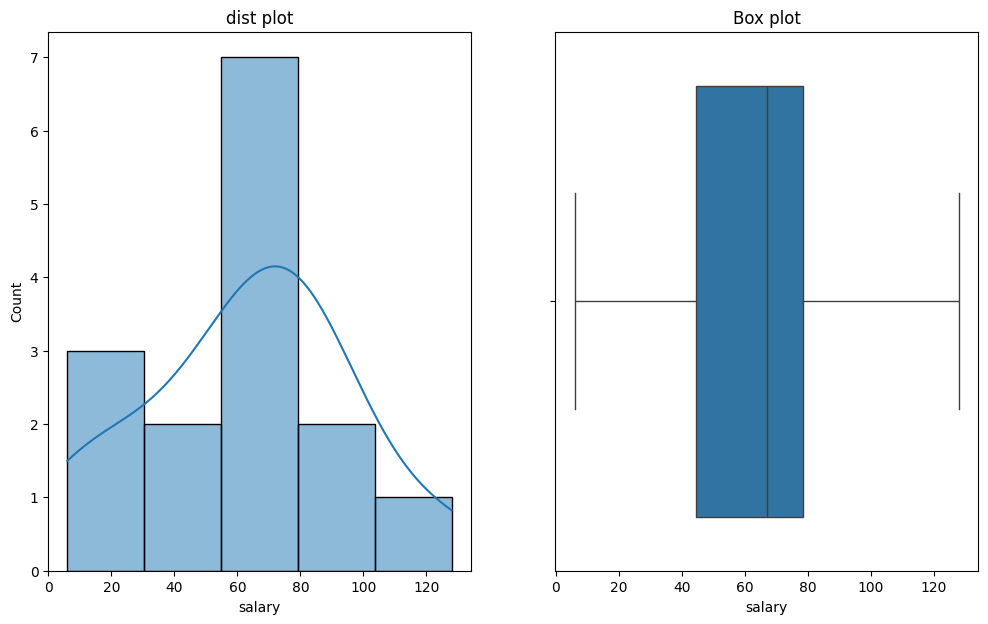

In [63]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'],kde=True)
plt.title('dist plot')

plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='salary')
plt.title('Box plot')

plt.show()

In [76]:
# Replace the outlier with mean and median

df['salary_mean_imputed']=np.where((df.salary>=upper_fence) | (df.salary<=lower_fence),df['salary'].mean(),df['salary'])

In [77]:
salary_mean_imputed

array([ 11.        ,  23.        ,   6.        ,  45.        ,
        67.        ,  78.        ,  89.        ,  78.        ,
        65.        ,  44.        ,  56.        ,  77.        ,
       121.58823529,  79.        , 100.        , 128.        ,
       121.58823529])

In [78]:
df

,salary,salary_mean_imputed
0,11,11.000000
1,23,23.000000
2,6,6.000000
3,45,45.000000
4,67,67.000000
5,78,78.000000
6,89,89.000000
7,78,78.000000
8,65,65.000000
9,44,44.000000


from matplotlib import pyplot as plt
df['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['salary_mean_imputed'].plot(kind='hist', bins=20, title='salary_mean_imputed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='salary', y='salary_mean_imputed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['salary_mean_imputed'].plot(kind='line', figsize=(8, 4), title='salary_mean_imputed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:
#capping >> replacing outlierwith the nearest value that is not outliers

In [80]:
lower_cap=df['salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap=df['salary'].quantile(0.95) #upper cap as 95th percentile

In [82]:
lower_cap

10.0

In [83]:
upper_cap

357.3999999999995

In [84]:
df

,salary,salary_mean_imputed
0,11,11.000000
1,23,23.000000
2,6,6.000000
3,45,45.000000
4,67,67.000000
5,78,78.000000
6,89,89.000000
7,78,78.000000
8,65,65.000000
9,44,44.000000


In [86]:
df['salary_capped']=np.where(df['salary']<=lower_cap,lower_cap,np.where(df['salary']> upper_cap,upper_cap,df['salary']))

In [87]:
df

,salary,salary_mean_imputed,salary_capped
0,11,11.000000,11.0
1,23,23.000000,23.0
2,6,6.000000,10.0
3,45,45.000000,45.0
4,67,67.000000,67.0
5,78,78.000000,78.0
6,89,89.000000,89.0
7,78,78.000000,78.0
8,65,65.000000,65.0
9,44,44.000000,44.0


Text(0.5, 1.0, 'Box plot')

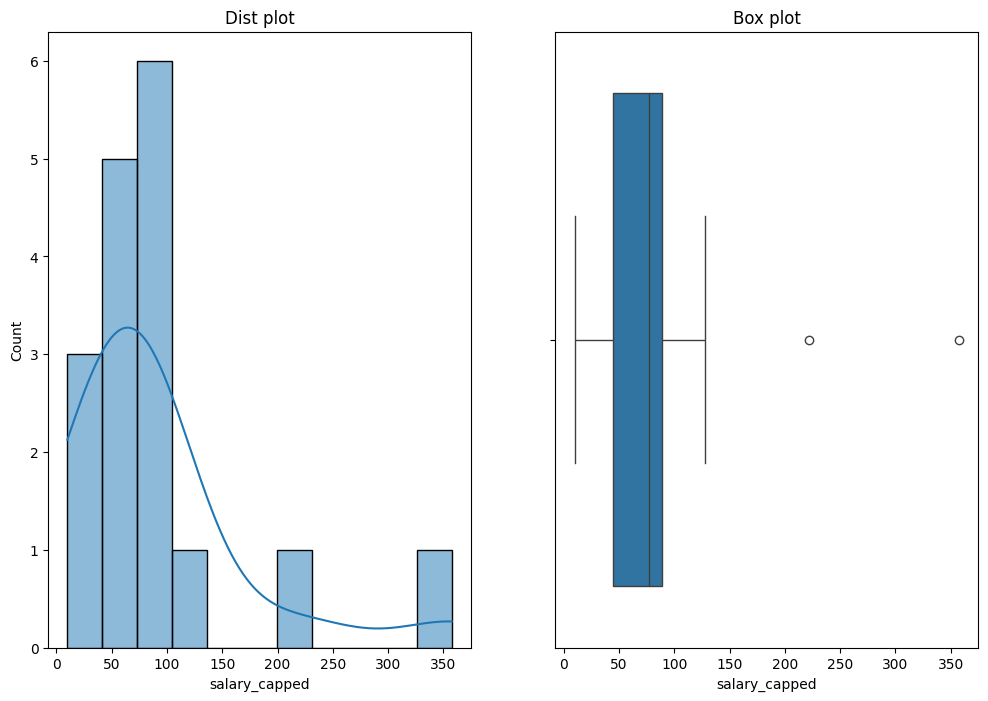

In [95]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.histplot(df['salary_capped'],kde=True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_capped')
plt.title('Box plot')